# 들어가기 앞서
pandas는 고수준의 자료 구조와 파이썬을 통한 빠르고 쉬운 데이터 분석 도구를 포함 한다. pandas는 NumPy 기반에서 개발되어 NumPy를 사용하는 애플리케이션에서 쉽게 사용할 수 있다.  
 저자가 투자 운용 회사인 AQR에 재직 중이던 2008년 초에 pandas를 개발하기 시작했다. 그때는 내가 원하눈 명확한 요구사항에 부합되는 도구를 찾을 수 없어 안타까웠는데, 내가 원하는 기능은 다음과 같았다.
 * 자동적으로 혹은 명시적으로 축의 이름에 따라 데이터를 정렬할 수 있는 자료, 잘못 정렬된 데이터에 의한 일반적인 오류를 예방하고 다양한 소스에서 가져온 다양한 방식으로 색인되어 있는 데이터를 다룰 수 있는 기능
 * 통합된 시계열 기능
 * 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조
 * 산술연산과 한 축의 모든 값을 더하는 등의 데이터 축약연산은 축의 이름 같은 메타데이터로 전달될 수 있어야 함
 * 누란된 데이터를 유연하게 처리할 수 있는 기능
 * SQL 같은 일반 데이터베이스처럼 데이터를 합치고 관계연산을 수행하는 기능
 
저자는 가급급저이면 한 가지 언어로 범용 소프트웨어를 쉽게 개발할 수 있도록 이 모든 기능을 한번에 해결할 수 있기를 원했음. 파이썬은 이를 위한 휼륭한 후보였지만 그 당시에는 이 기능을 지원하는 도구와 자료 구조가 없었다.  
지난 4년간 pandas는 내가 기대했던 것보다 휠씬 더 안정적으로 대용량 데이터를 처리할 수 있게 확장되었고 상당히 큰 라이브러리가 되었음에도 다행히 초기에 내가 원했던 간편함과 단순함에 대한 기본 방침은 유지되었다. 이 책을 읽고 난 후 독자에게도 pandas가 없어서도 안될 필수 도구가 되기를 바란다.(1판 내용)

(2판 내용)
Pandas는 NumPy, SciPy 같은 수치 연산 도구와 (편집자 주: parametric한)통계 모형들,(편집자 주: non-parametric한 )scikit-learn등 같은 해석적 라이브러리 그리고 matplotlib 같은 시각화 라이브러리와 같이 연결되어서 사용되어진다. pandas는 numpy 배열 기반 연산의 관용적인 스타일의 상당한 부분, 특별히 배열 기반 함수와 루프 없는 데이터 처리에 대한 우선권 부분을 채용 했다. Pandas는 NumPy로 부터 코딩 관습을 채용한 반면에, 상당히 큰 차이점은 pandas는 비균질적인 데이터 또는 테이블에 연산에 대해서 설계되었다. 대조적으로 NumPy는 균질적인 numerical 배열 데이터 연산에 대해서 최적으로 설계되었다. 2010년부터 오픈소스 프로젝트가 시작된 이래로 pandas는 광법위한 실제 사레에 적용할 수 있는 만큼 큰 라이브러리로 성숙되었다. 개발자 커뮤니티는 일상적인 데이터 문제를 해결하는데 pandas 프로젝트 구성하는데 도움을 줬던 800명 넘는 개발자 가진 커뮤니티로 성장했다  

### pandas의 import 관습은 다음과 같다.
```python
from pandas import Series, DataFrame

import pandas as pd
```
Series와 Dataframe은 로컬 네임 스페이스로 import하는 것이 훨씬 편하므로 이렇게 사용하자.
## pandas 자료 구조 소개
pandas에 대해서 알아보려면 Series와 DataFrame, 이 두 가지 자료 구조에 익술해질 필요가 있다. 이 두 가지 자료 구조로 모든 문제를 해결할 수는 없지만 대부분의 애플리케이션에서 사용하기 쉽고 탄탄한 기반을 제공한다.
### Series
Series는 일련의 객체를 담을 수 있는 1차원 배열 같은 자료 구조다 (어떤 NumPy 자료형이라도 담을 수 있다).
그리고 _색인(index)_이라고 하는 배열의 데이터와 연관된 이름을 가지고 있다. 가장 간단한 Series 객체는 배열 데이터로부터 생성할 수 있다.

In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
obj = pd.Series([4, 7, -5, 3])

In [3]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

Series 객체의 문자열 표현은 왼쪽에 색인을 보여주고 오른쪽에 해당 색인의 값을 보여준다. 앞의 예제에서는 데이터의 색인을 지정하지 않았으니 기본 색인인 정수0 에서 N-1(N은 데이터의 길이다)까지의 숫자가 표시된다. Series의 배열과 색인 객체는 각각 values와 index 속성을 통해 얻을 수 있다.

In [4]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [5]:
obj.index # like range(4)

RangeIndex(start=0, stop=4, step=1)

각각의 데이터를 지징하는 색인을 지정해 Series 객체를 생성해야 할 때는 다음처럼 생성한다.

In [6]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [8]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

배열에서 값을 선택하거나 대입할 떄는 색인을 이용해서 접근한다.

In [10]:
 obj2['a']

-5

In [11]:
obj2['d'] = 6

In [12]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

불리언 배열을 사용해서 값을 걸러내거나 산술 곱셈을 수행하거나 또는 수학 함수를 적용하는 등 NumPy 배열 연산을 수행해도 "색인-값" 연결은 유지된다.

In [13]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [14]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [15]:
np.exp(obj2)

NameError: name 'np' is not defined

In [16]:
import numpy as np
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Series를 이해하는 다른 방법은 고정 길이의 정렬된 사전형이라고 이해하는 것이다. Series는 색인 값에 데이터 값을 매밍하고 있으므로 파이썬의 사전형과 비슷하다. Series 객체는 파이썬의 사전형을 인자로 받아야 하는 많은 함수에서 사전형을 대체하여 사용할 수 있다.

In [17]:
 'b' in obj2

True

In [18]:
'e' in obj2

False

파이썬 사전형에 데이터를 저장해야 한다면 파이썬 사전 객체로부터 Series 객체를 생성할 수도 있다.

In [20]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000} obj3 = pd.Series(sdata)

In [21]:
obj3 = pd.Series(sdata)

In [22]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

사전 객체만 가지고 Series 객체를 생성하면 생성된 Series 객체의 색인은 사전의 키 값이 순서대로 들어간다.

In [23]:
 states = ['California', 'Ohio', 'Oregon', 'Texas']

In [24]:
obj4 = pd.Series(sdata, index=states)

In [25]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

이 예제를 sdata에 있는 값 중 3개만 확인할 수 있는데, 이는 "California"에 대한 값을 찾을 수 없기 때문이다. 이 값은 NaN(not a number)으로 표시되고 pandas에서는 누락된 값 혹은 NA 값으로 취급된다. 저자는 앞으로 "누락된"과"NA"를 누락된 데이터를 지징하는 데 사용함.  
pandas의 isnull과 notnull 함수는 누락된 데이터를 찾을 때는 사용된다.

In [26]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [27]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

이 메소드는 Series의 인스턴스 메소드이기도 하다.

In [28]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

**누락된 데이터를 처리하는 방법은 끝부분에서 살펴보기로 하고 가장 중요한 Series의 기능은 다르게 색인된 데이터에 대한 산술연산이다**

In [29]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [30]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [31]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

데이터 정렬에 대한 내용은 다른 주제를 다룰 때 살펴보겠다.

**Series 객체와 Series의 색인은 모두 name 속성이 있는데, 이 속성은 pandas의 기능에서 중요한 부분을 차지하고 있다**


In [32]:
obj4.name = 'population'

In [33]:
obj4.index.name = 'state'

In [34]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series의 색인은 대입을 통해 변경할 수 있다.

In [35]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [36]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [37]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame
DataFrame은 표 같은 스프레드시트 형식의 자료 구조로 여러 개의 칼럼이 있는데, 각 칼럼은 서로 다른 종류의 값(숫자, 문자열, 불리언 등)을 담을 수 있다. DataFrame은 로우와 칼럼에 대한 색인이 있는데, 이 DataFrame은 색인의 모양이 같은 Series 객체를 담고 있는 파이썬 사전으로 생각하면 편한다. R의 data.frame 같은 다른 DataFrame과 비슷한 자료 구조와 비교했을 때, DataFrame에서 로우 연산과 칼럼 연산은 거의 대칭적으로 취급된다. 내부적으로 데이터는 리스트나 사전 또는 1차원 배열을 담고 있는 다른 컬렉션이 아니라 하나 이상의 2차원 배열에 저장된다. 구체적인 DataFrame의 내부 구조는 여기서 다루는 내용에서 벗어나므로 생략.

note:
DataFrame은 데이터를 내부적으로 2차원 형식으로 저장하므로, 고차원의 표 형식 데이터를 나중에 살펴볼 계층적 색인(hierachical indexing)을 통해 쉽게 표현할 수 있다. 계층적 색인은 pandas에서 데이터를 취급하는 고급 기능에 필수적인 요소이다.  

DataFrame 객체는 다양한 방법으로 생성할 수 있지만 가장 흔하게 사용되는 방법은 같은 길이의 리스트에 담긴 사전을 이용하거나 NumPy 배열을 이용하는 방법이다.

```python
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
```   
위코드로
만들어진 DataFrame의 색인은 Series와 같은 방식으로 자동으로 대입되며 칼럼은 정렬되어 저장된다.

In [38]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [39]:
frame

pop   state  year
0  1.5    Ohio  2000
1  1.7    Ohio  2001
2  3.6    Ohio  2002
3  2.4  Nevada  2001
4  2.9  Nevada  2002
5  3.2  Nevada  2003

위의 결과는 주피터 결과에서 실행했 때 결과이다 .즉 pandas DataFrame이 HTML table에 가까운 웹 브라우저 형태로 표시 될 수 있다.|

큰 DataFrame 경우는 head 메소드를 사용해서 5개의 row 만 보여줄수 있다.

In [40]:
frame.head()

pop   state  year
0  1.5    Ohio  2000
1  1.7    Ohio  2001
2  3.6    Ohio  2002
3  2.4  Nevada  2001
4  2.9  Nevada  2002

만약에 특수한 column 열을 얻고 싶다면 아래와 같이 입력해서 DataFrame's columns 순서를 얻을 수 있다.

In [41]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9
5  2003  Nevada  3.2

Series와 마친가지로 data에 없는 값을 넘기면 NA 값이 지정된다.

In [43]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])

In [44]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [45]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

DataFrame의 칼럼은 Series처럼 사전 형식의 표기법으로 접근하거나 속성 형식으로 접근할 수 있다.

In [46]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [47]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

IPython에서 속성 형식 접근(frame2.year) 그리고 칼럼 이름 완성은 탭 형식 형태로 편의상 제공 된다(자동완성 기능).  
임의 컬럼 이름에 대해서 frame2[column]도 이렇게 작동하지만, frame2.column은 컬럼 이름이 파이썬 변수이름 일때만 가능하다.  
반환된 Series 객체가 DataFrame 같은 색인을 가지면 알맞은 값으로 name 속성이 채워진다. 로우는 위치(loc)나 ix 같은 몇 가지 메소드를 통해 접근할 수 있다.

In [48]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [49]:
frame2.ix['three']

C:\Users\177303\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

칼럼은 대입이 가능하다. 예를 들면 현재 비어있는 'debt' 칼럼에 스칼라 값이나 배열의 값을 대입할 수 있다.

In [50]:
 frame2['debt'] = 16.5

In [51]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5

In [52]:
frame2['debt'] = np.arange(6.)

In [53]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

리스트나 배열을 칼럼에 대입할 때는 대입하려는 값의 길이가 DataFrame의 크기와 같아야한다. Series를 대입하면 DataFrame의 색인에 따라 값이 대입되면 없는 색인에는 값이 대입되지 않는다.

In [54]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [55]:
frame2['debt'] = val

In [56]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7
six    2003  Nevada  3.2   NaN

없는 칼럼을 대입하면 새로운 칼럼이 생성된다. 파이썬 사전형에서와 마찬가지로 del 예약어를 사용해서 칼럼을 삭제할 수 있다.

In [57]:
frame2['eastern'] = frame2.state == 'Ohio' #New columns cannot be created with the frame2.eastern syntax.

In [58]:
frame2

year   state  pop  debt  eastern
one    2000    Ohio  1.5   NaN     True
two    2001    Ohio  1.7  -1.2     True
three  2002    Ohio  3.6   NaN     True
four   2001  Nevada  2.4  -1.5    False
five   2002  Nevada  2.9  -1.7    False
six    2003  Nevada  3.2   NaN    False

In [59]:
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'eastern'], dtype='object')

In [60]:
del frame2['eastern']

In [61]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

** TIP:  
DataFrame의 색인을 이용해서 생성된 칼럼은 내부 데이터에 대한 뷰(view)이며 복사가 이루어지지 않는다. 따라서 이렇게 얻은 Series 객체에 대한 변경은 실제 DataFrame에 반영된다. 복사본이 필요할 때는 Series의 copy 메소드를 이용하자**  

또한 중첩된 사전을 이용해서 데이터를 생성할 수 있는데, 다음과 같이 중첩된 사전이 있다면

In [62]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
    'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

바깥에 있는 사전의 키 값이 칼럼이 되고 안에 있는 키는 로우가 된다.

In [63]:
frame3 = DataFrame(pop)

In [64]:
frame3

Nevada  Ohio
2000     NaN   1.5
2001     2.4   1.7
2002     2.9   3.6

NumPy에서와 마찬가지로 결과 값의 순서를 뒤집을 수 있다.

In [65]:
frame3.T

2000  2001  2002
Nevada   NaN   2.4   2.9
Ohio     1.5   1.7   3.6

중첩된 사전을 이용해서 DataFrame을 생성할 때 안쪽에 있는 사전 값은 키 값별로 조합되어 결과의 색인이 되지만 색인을 직접한다면 지정된 색인으로 DataFrame을 생성한다

In [69]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003     NaN   NaN

Series 객체를 담고 있는 사전 데이터도 같은 방식으로 취급된다.

In [71]:
pdata = {'Ohio': frame3['Ohio'][:-1],
    'Nevada': frame3['Nevada'][:2]}

In [72]:
DataFrame(pdata)

Nevada  Ohio
2000     NaN   1.5
2001     2.4   1.7

DataFrame 생성자에 넘길 수 있는 자료형의 목록은 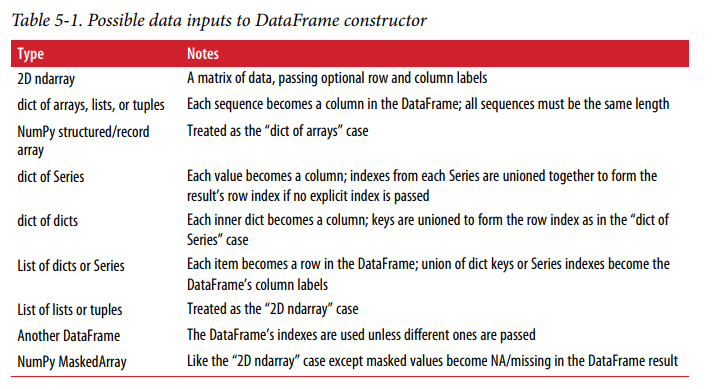

만약 DataFrame의 인덱스와 컬럼이 그들의 이름 속성을 가진다면, 인덱스와 칼럼은 표시 될 수 있다.  

In [74]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [75]:
frame3

state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6

Series와 유사하게 values 속성은 DataFrame에 저장된 데이터를 2차원 배열로 반환한다.

In [76]:
frame3.values

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

DataFrame의 칼럼에 서로 다른 dtype이 있다면 모든 칼럼을 수용하기 위해 그 칼럼 배열의 dtype이 선택된다

In [78]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

### 색인 객체
pandas의 색인 index 객체는 표 형식의 데이터에서 각 로우와 칼럼에 대한 이름과 다른 메타데이터(축의 이름 등)를 저장하는 객체다.  
Series나 DataFrame 객체를 생성할 때 사용되는 배열이나 혹은 다른 순차적인 이름은 내부적으로 색인으로 변환된다.

In [79]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [80]:
index = obj.index

In [81]:
index

Index(['a', 'b', 'c'], dtype='object')

In [82]:
index[1:]

Index(['b', 'c'], dtype='object')

In [83]:
index[1] = 'd' # TypeError

TypeError: Index does not support mutable operations

색인 index 객체는 변경할 수 없기에 자료 구조 사이에서 안전하게 공유될 수 있다.

In [84]:
labels = pd.Index(np.arange(3))

In [85]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [86]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [87]:
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [88]:
obj2.index is labels

True

Some users will not often take advantage of the capabilities pro‐
vided by indexes, but because some operations will yield results
containing indexed data, it’s important to understand how they
work.

일반 사용자는 index 객체에 대해 자세히 몰라도 되지만 Index 객체는 pandas의 데이터 모델에서 중요한 부분이다.

|클래스|설명|
|------|----:|
|index | 가장 일반적인 index 객체이며, 파이썬 객체의 NumPy 배열 행식으로 축의 이름을 표현한다|
|Int64Index | 정수 값을 위한 특수한 index|
|MutiIndex | 단일 축에 여러 단계의 색인을 표현하는 계층적 색인 객체, 튜플의 배열과 유사하다고 볼수 있다.|
|DatetimeIndex | 나노초 타임스탬프를 저장한다(Numpy의 datetime64 dtype으로 표현된다) |
|PeriodIndex | 기간 데이터를 위한 특수한 index |

In addition to being array-like, an Index also behaves like a fixed-size set:  
배열과 유사하게 index 객체도 고정 크기로 동작한다.

In [89]:
frame3

state  Nevada  Ohio
year               
2000      NaN   1.5
2001      2.4   1.7
2002      2.9   3.6

In [90]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [91]:
'Ohio' in frame3.columns

True

In [92]:
2003 in frame3.index

False

Unlike Python sets, a pandas Index can contain duplicate labels:

In [93]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [94]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Selections with duplicate labels will select all occurrences of that label.
Each Index has a number of methods and properties for set logic, which answer other
common questions about the data it contains. Some useful ones are summarized in
Table 5-2.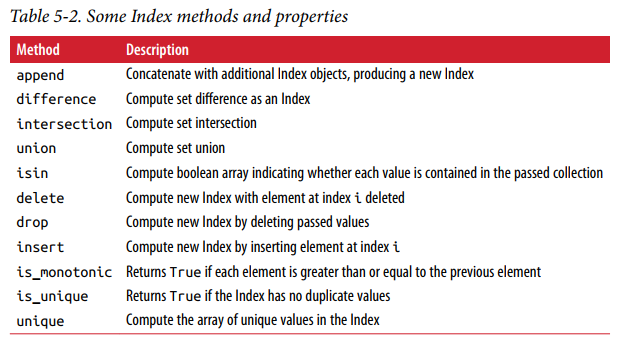

## 핵심 기능
Series나 DataFrame에 저장된 데이터를 다루는 기본 방법을 설명한다. 앞으로 pandas를 이용한 데이터 분석과 조작에 관한 좀 더 자세한 내용을 살펴볼 것이다. pandas 라이브러리에 대한 완전한 설명은 자제하고(pandas 문서 참조) 중요한 기능에만 초점을 맞추고 있다. 잘 사용하지 않는 내용에 대학 학습은 pandas 홈페이지에서 보는 것을 추천한다.
### 재색인
pandas 객체의 중요한 메소드는 reindex는 새로운 색인에 **맞도록** 객체를 새로 생성하는 기능이다.

In [95]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [96]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

이 Series 객체에 대해 reindex를 호출하면 데이터를 새로운 색인에 맞게 재배열하고, 없는 색인 값이 있다면 비어있는 값을 새로 추가한다.

In [97]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [98]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [99]:
obj.reindex(['a', 'b', 'c', 'd', 'e'],fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

시계열 같은 순차적인 데이터를 재색인할 때 값을 보간하거나 채워 넣어야 할 경우가 있다.  
이런 경우 method 옵션을 이용해서 해결할 수 있으며,ffill 메소드를 이용하면 앞의 값으로 누락된 값을 채워 넣을 수 있다.

In [100]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [101]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [102]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

reindex 메소드(보간)옵션

|인자   |설명    |
|-------|--------:|
|ffill 또는 pad | 앞의 값으로 채워 넣는다|
|bfill 또는 backfill | 뒤의 값으로 채워 넣는다|

DataFrame에 대한 reindex는 (row) index, column 또는 둘 다 변경이 가능하다. 그냥 순서만 전달하면 로우가 reindexing 된다.

In [110]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

In [104]:
frame

Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8

In [105]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [106]:
frame2

Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0

열은 columns 예약어를 사용해서 재색인할 수 있다.

In [108]:
states = ['Texas', 'Utah', 'California']

In [111]:
frame.reindex(columns=states)

Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8

재색인 함수 인자
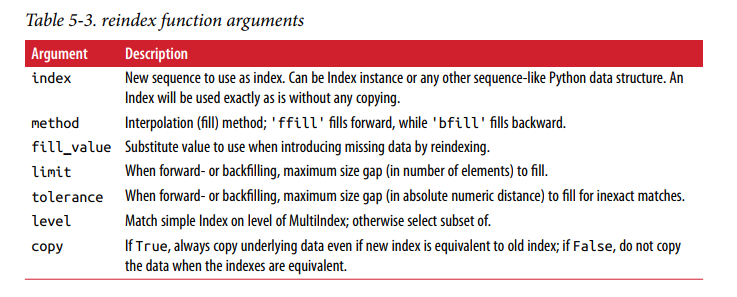

로우와 컬럼을 모두 한 번에 재색인할 수 있지만 보간은 로우(axis 0)에 대해서만 이루어진다

In [112]:
frame.reindex(index = ['a', 'b', 'c','d'], method = 'ffill', columns = states)

ValueError: index must be monotonic increasing or decreasing

재색인을 loc 이나 ix를 이용해서 라벨로 색인하면 좀 더 간결하게 할 수 있다.

In [113]:
frame.loc[['a', 'b', 'c', 'd'], states]

Texas  Utah  California
a    1.0   NaN         2.0
b    NaN   NaN         NaN
c    4.0   NaN         5.0
d    7.0   NaN         8.0

### 하나의 로우 또는 칼럼 삭제하기
색인 배열 또는 삭제하려는 로우나 칼럼이 제외된 리스트를 이미 가지고 있다면 로우나 칼럼을 쉽게 삭제할 수 있는데, 이 방법은 데이터의 모양을 변경하는 작업이 필요하다. drop 메소드를 사용하면 선택한 값이 삭제된 새로운 객체를 얻을 수 있다.

In [114]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [115]:
 obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [116]:
new_obj = obj.drop('c')

In [117]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [118]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

DataFrame에서는 로우와 칼럼 모두에서 값을 삭제할 수 있다.

In [119]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [120]:
 data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [121]:
data.drop(['Colorado', 'Ohio'])

one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15

In [122]:
data.drop('two', axis=1)

one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15

In [123]:
 data.drop(['two', 'four'], axis='columns')

one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
New York   12     14

In [124]:
obj.drop('c', inplace=True)

In [125]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

Series 나 DataFrame의 크기 나 모양을 수정하는 drop과 같은 많은 함수는,
새 객체를 반환하지 않고 현재 위치에서 객체를 조작 할 수 있다.

### 색인하기, 선택하기, 거르기
Series의 (obj[...])은 NumPy 배열의 색인과 유사하게 동작하는데, Series의 색인은 정수가 아니어도 된다는 점이 다르다. 몇 가지 예제를 살펴보면

In [126]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [127]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [128]:
obj['b']

1.0

In [129]:
obj[1]

1.0

In [131]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [133]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [134]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [135]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

라벨 이름으로 슬라이싱하는 것은 시작점과 끝점을 포함한다는 점이 일반 파이썬에서 슬라이싱과 다른 점이다.

In [136]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

슬라이싱 문법으로 선택된 영역에 값을 대입하는 것은 예상한 대로 동작한다

In [137]:
obj['b':'c'] = 5

In [139]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

앞에서 확인했듯이 색인으로 DataFrame에서 칼럼의 값을 하나 이상 가져올 수 있다.

In [140]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [141]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [142]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [143]:
data[['three','one']]

three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12

슬라이싱으로 로우를 선택하거나 불리언 배열로 칼럼을 선택할 수도 있다.

In [144]:
data[:2]

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

In [145]:
data[data['three']>5]

one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

이 문법에 모순이 있다고 생각할지도 모르나 이문법은 실용성에 기인한 것 일 뿐이다. 또 다른 사례는 스칼라 비교를 통해 생성된 불리언 DataFrame을 사용해서 값을 선택하는 것이다.

In [146]:
data < 5

one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False

In [147]:
data[data <5 ] = 0

In [148]:
data

one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

이 예제는 DataFrame을 ndarray와 문법적으로 비슷하게 보이도록 의도한 것 이다.  

DataFrame의 칼럼에 대해 라벨로 색인하는 방법으로, 특수한 색인 필드 loc 또는 iloc를 소개한다.  
loc 또는 iloc(정수색인) 는 NumPy와 비슷한 방식에 추가적으로 축의 라벨을 사용하여 DataFrame의 로우와 칼럼을 선택할수 있도록 한다. 앞에서 언급했듯이 이 방법은 재색인을 좀 더 간단하게 할 수 있는 방법이다. 구버전 ix는 허용이 안된다.

In [149]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [150]:
data.ix['Colorado', ['two', 'three']]

C:\Users\177303\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


two      5
three    6
Name: Colorado, dtype: int32

In [151]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [152]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [153]:
data.iloc[[1, 2], [3, 0, 1]]

four  one  two
Colorado     7    0    5
Utah        11    8    9

In [154]:
data.loc[:'Utah', 'two'] #Both indexing functions work with slices in addition to single labels or lists of labels

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [155]:
data.iloc[:, :3][data.three > 5]

one  two  three
Colorado    0    5      6
Utah        8    9     10
New York   12   13     14

pandas 객체에 담겨져 있는 데이터를 재배열 또는 선택할 수 있는 많은 방법이 있다.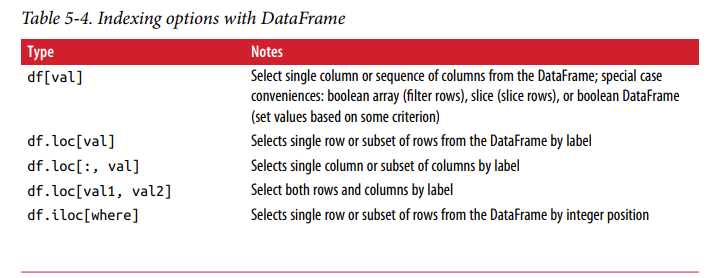

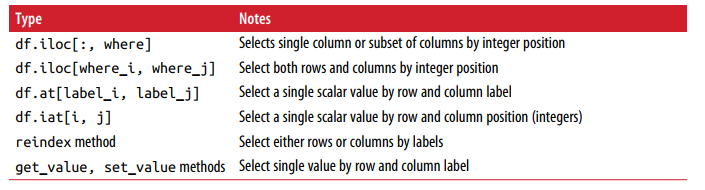

DataFrame 경우 위 테이블 5-4에 데이터테이블로 색인하는 옵션을 정리한것이다.  
추가적으로 계층적인 색인으로 작업하는 경우에 추가적인 선택 사항이 있는데 이것은 나중에 볼 것이다.

note:  
pandas를 설계할 때 저자가 빈번하게 일어나난 칼럼 선택 작업을 할 때마다 칼럼을 선택하기 위해 frame[:, col]이라고 입력해야 하는 것이 너무 과하다고 생각했음(입력할 내용이 많으면 오류가 발생할 확률도 높아진다). 그래서 라벨 색인 기능을 모두 ix 연산에 밀어 넣기로 결정했음(1판 기준).
그러나 나중에(2판) pandas 팀이 대부분 경우 integer axis labels 사용하는 많음을 
인지하고 라벨 색인 기능(loc)과 정수 색인 연산자(iloc)를 만들었다 물론 ix연산자 존재하지만 이 명령어 쓰는 것을 권장하지 않음

### 정수 색인

정수로 색인한 pandas 객체로 하는 작업은 파이썬 내장 자료구조인 리스트와 튜플에서 색인 문법과 차이점 때문에 pandas에 처음 접한 사용자는 헤매일 것이다.

In [156]:
ser = pd.Series(np.arange(3.))

In [157]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [158]:
ser[-1] #fallback

KeyError: -1


이러한 경우는 pandas는 정수 색인에서 뒤로 갈 수 있다 그러나 미묘판 버그를 도입하지 않고 이것을 실행하기는 힘들다.  
0~2까지 담고있는 색인을 가지고 있지만 사용자 원하는 방향대로 유추하지는 못한다.

In [163]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

반면에 음수인 정수인 경우, 잠재적인 모호함이 없다.

In [159]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [160]:
ser2[-1]

2.0


이러한 일관성을 지키기 위해 정수, 데이터 선택을 담고있는 축 색인을 가지고 있는 경우 항상 라벨 지향적으로 색인 해야한다.  
게다가 정확한 데이터 조작을 위해 라벨경우는 loc를 정수의 경우는 iloc를 사용해야한다

In [161]:
ser[:1]

0    0.0
dtype: float64

In [162]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

### 산술연산과 데이터 정렬
pandas에서 중요한 기능은 색인이 다른 객체 간의 산술연산이다. 객체를 더할 때 짝이 맞지 않는 색이 있다면 결과에 두 색인이 통합된다. 

In [164]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [165]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index=['a', 'c', 'e', 'f', 'g'])

In [166]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [168]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [169]:
 s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

서로 겹치는 색인이 없다면 데이터는 NA 값이 된다. 산술연산 시 누락된 값은 전파되며, DataFrame에서는 로우와 칼럼 모두에 적용된다

In [171]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])

In [172]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [173]:
df1

b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0

In [174]:
df2

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

이 두 DataFrame을 더하면 각 DataFrame에 있는 색인과 칼럼이 하나로 합쳐진다.

In [175]:
df1 + df2

b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN

In [176]:
df1 = pd.DataFrame({'A': [1, 2]})

In [177]:
df2 = pd.DataFrame({'B': [3, 4]})

In [178]:
df1

A
0  1
1  2

In [179]:
df2

B
0  3
1  4

In [180]:
df1 - df2

A   B
0 NaN NaN
1 NaN NaN

### 산술연산 메소드에 채워 넣을 값 지정하기
서로 다른 색인을 가지는 객체 간의 산술연산에서 존재하지 않는 축의 값을 특수한 값(0 같은)으로 지정하고 싶을 떄는 다음과 같이 할 수 있다.

In [181]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
 columns=list('abcd'))

In [182]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
columns=list('abcde'))

In [183]:
df2.loc[1, 'b'] = np.nan

In [184]:
df1

a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0

In [185]:
df2

a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0

이 둘을 더하면 겹치지 않는 부분의 값은 NA 값이 된다.

In [186]:
df1 + df2

a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0   NaN  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN

df1의 add 매소드로 df2와 fill_value 값을 인자로 전달한다.

In [187]:
 df1.add(df2, fill_value=0)

a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0   5.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0

산술연산에대한 DataFrame, Series 목록이 표 5-5 정리되어 있다.  
각 연산의 반대연산 부분은 알파벳r시작되는걸 볼수 있는데 동등하다.. 

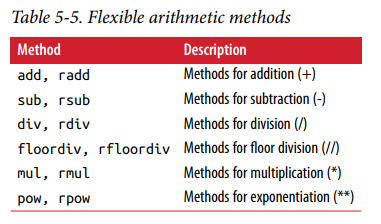

In [190]:
1 / df1

a         b         c         d
0       inf  1.000000  0.500000  0.333333
1  0.250000  0.200000  0.166667  0.142857
2  0.125000  0.111111  0.100000  0.090909

In [191]:
df1.rdiv(1)

a         b         c         d
0       inf  1.000000  0.500000  0.333333
1  0.250000  0.200000  0.166667  0.142857
2  0.125000  0.111111  0.100000  0.090909

Series나 DataFrame을 재색인할 때 역시 fill_value를 지정할 수 있다.

In [188]:
df1.reindex(columns=df2.columns, fill_value=0)

a    b     c     d  e
0  0.0  1.0   2.0   3.0  0
1  4.0  5.0   6.0   7.0  0
2  8.0  9.0  10.0  11.0  0

### DataFrame과 Series 간의 연산
NumPy 배열의 연산처럼 DataFrame과 Series 간의 연산도 잘 정의되어 있다. 먼저 2차원 배열과 그 배열 중 한 칼럼의 차이에 대해서 생각할 수 있는 예제를 살펴보자.

In [192]:
arr = np.arange(12.).reshape((3, 4))

In [193]:
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [194]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [195]:
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

이 예제는 *브로드캐스팅(broadcasting)*에 대한 예제로, NumPy_Adv 부분을 참고하면 된다.  
그래서 하고 싶은 말은 DataFrame과 Series 간의 연산은 이와 유사하다.

In [196]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
 columns=list('bde'),
index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [197]:
Series = frame.loc[0]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [198]:
series = frame.iloc[0]

In [199]:
frame

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [201]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

기본적으로 DataFrame과 Series 간의 산술연산은 Series의 색인을 DataFrame의 칼럼에 맞추고 아래 로우로 전파한다.

In [202]:
frame - series

b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0

만약 색인 값을 DataFrame의 칼럼이나 Series의 색인에서 찾을 수 없다면 그 객체는 형식을 맟주기 위해 재색인된다.

In [203]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [204]:
frame + series2

b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN

만약 각 로우에 대해 연산을 수행하고 싶다면 산술연산 메서드를 사용하면 된다.

In [205]:
series3 = frame['d']

In [206]:
frame

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [207]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [208]:
frame.sub(series3, axis='index')

b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0

이 예에서 인자로 넘기는 axis 값은 연산을 적용할 축 번호이며, 여기서  (axis='index' or axis=0) 은 DataFrame의 로우를 따라 연산을 수행하라는 의미이다
### 함수 적용과 매핑
판다스 객체에도 넘파이의 유니버셜 함수(배열의 각 원소에 적용되는 메소드)를 적용할 수 있다.

In [209]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [210]:
frame

b         d         e
Utah   -1.343154 -1.276536  0.776114
Ohio   -0.587992  0.911212 -1.621786
Texas   0.192598  1.275802 -0.433238
Oregon  0.148479  0.544752 -1.152355

In [211]:
np.abs(frame)

b         d         e
Utah    1.343154  1.276536  0.776114
Ohio    0.587992  0.911212  1.621786
Texas   0.192598  1.275802  0.433238
Oregon  0.148479  0.544752  1.152355

자주 사용되는 또 다른 연산은 각 로우나 칼럼의 1차원 배열에 함수를 적용하는 것이다.  
DataFrame의 apply 메소드를 통해 수행할 수 있다

lambda 인자 : 표현식
```python
def hap(x, y):
    return x + y

(lambda x,y: x + y)(10, 20) == hap(10, 20)
```
함수를 정의해야하는데 이렇게 되면 다른 소스 코드(framework 부분)를 건들일 여지가 있는데  
일시적으로 함수형포인터형태 선언해서 사용하는 기법이다.

In [212]:
f = lambda x: x.max() - x.min()

In [213]:
frame.apply(f)

b    1.535752
d    2.552338
e    2.397900
dtype: float64

In [214]:
frame.apply(f, axis='columns')

Utah      2.119268
Ohio      2.532998
Texas     1.709039
Oregon    1.697107
dtype: float64

배열의 합계sum나 평균mean 같은 일반적인 통게는 DataFrame의 메소드로 있으므로 apply 메소드를 사용해야만 하는 것은 아니다.

apply 메소드에 전달된 함수는 스칼라 값을 반환할 필요가 없으며, Series 또는 여러 값을 반환해도 된다.

In [215]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [216]:
frame.apply(f)

b         d         e
min -1.343154 -1.276536 -1.621786
max  0.192598  1.275802  0.776114

배열의 각 원소에 적용되는 파이썬의 함수를 사용할 수도 있다. frame 객체에서 실수 값을 문자열 포맷으로 변환하고 싶다면 applymap을 이용해서 다음과 같이 해도 된다.

In [217]:
format = lambda x: '%.2f' % x

In [218]:
frame.applymap(format)

b      d      e
Utah    -1.34  -1.28   0.78
Ohio    -0.59   0.91  -1.62
Texas    0.19   1.28  -0.43
Oregon   0.15   0.54  -1.15

이 메소드의 이름이 applymap인 이유는 Series가 각 원소에 적용할 함수를 지정하기 위한 map 메소드를 가지고 있기 때문이다.

In [219]:
frame['e'].map(format)

Utah       0.78
Ohio      -1.62
Texas     -0.43
Oregon    -1.15
Name: e, dtype: object

### 정렬과 순위
어떤 기준에 근거해서 데이터를 정렬하는 것이 역시 중요한 명려이다. 로우나 칼럼의 색인을 알파벳 순으로 정렬하려면 정렬된 새로운 객체를 반환하는 sort_index 메소드를 사용하면 된다.

In [220]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [221]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

DataFrame은 로우나 칼럼 중 하나의 축을 기준으로 정렬할 수 있다.

In [222]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
index=['three', 'one'],
columns=['d', 'a', 'b', 'c'])

In [223]:
frame.sort_index()

d  a  b  c
one    4  5  6  7
three  0  1  2  3

In [224]:
frame.sort_index(axis=1)

a  b  c  d
three  1  2  3  0
one    5  6  7  4

데이터는 기본적으로 오름차순으로 정렬되지만 내림차순으로 정렬할 수도 있다

In [225]:
frame.sort_index(axis=1, ascending=False)

d  c  b  a
three  0  3  2  1
one    4  7  6  5

Series 객체를 값에 따라 정렬하고 싶다면 Sort_values 메소드를 사용하자

In [227]:
obj = pd.Series([4, 7, -3, 2])

In [228]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

정렬할 때 비어있는 값은 기본적으로 Series 객체에서 가장 마지막에 위치한다.

In [229]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [230]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

DataFrame에서는 하나 이상의 칼럼에 있는 값으로 정렬이 필요할 수 있다. 이럴 떄는 by 옵션에 필요한 칼럼의 이름을 넘기면 된다.

In [231]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [232]:
frame

a  b
0  0  4
1  1  7
2  0 -3
3  1  2

In [233]:
frame.sort_values(by='b')

a  b
2  0 -3
3  1  2
0  0  4
1  1  7

여러 개의 칼럼을 정렬하려면 칼럼의 이름이 담긴 리스트를 전달하면 된다.

In [234]:
frame.sort_values(by=['a', 'b'])

a  b
2  0 -3
0  0  4
3  1  2
1  1  7

순위(ranking)는 정렬(sorting)과 거의 흡사하면, 1부터 배열의 유효한 데이터 개수까지의 순위를 메긴다. 또한 순위는 numpy.argsort에서 반환하는 간접 정렬 색인과 유사한데, 동률인 순위를 처리하는 방식이 다르다. 기본적으로 Series와 DataFrame의 rank 메소드는 동점인 항목에 대해서는 평균 순위를 매긴다.

In [235]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [236]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

데이터 상에서 나타나는 순서에 따라 순위를 매길 수도 있다.

In [237]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

내림차순으로 순위를 매길 수도 있다.

In [239]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

동률 tie-breacking을 처리하는 메소드 정리하면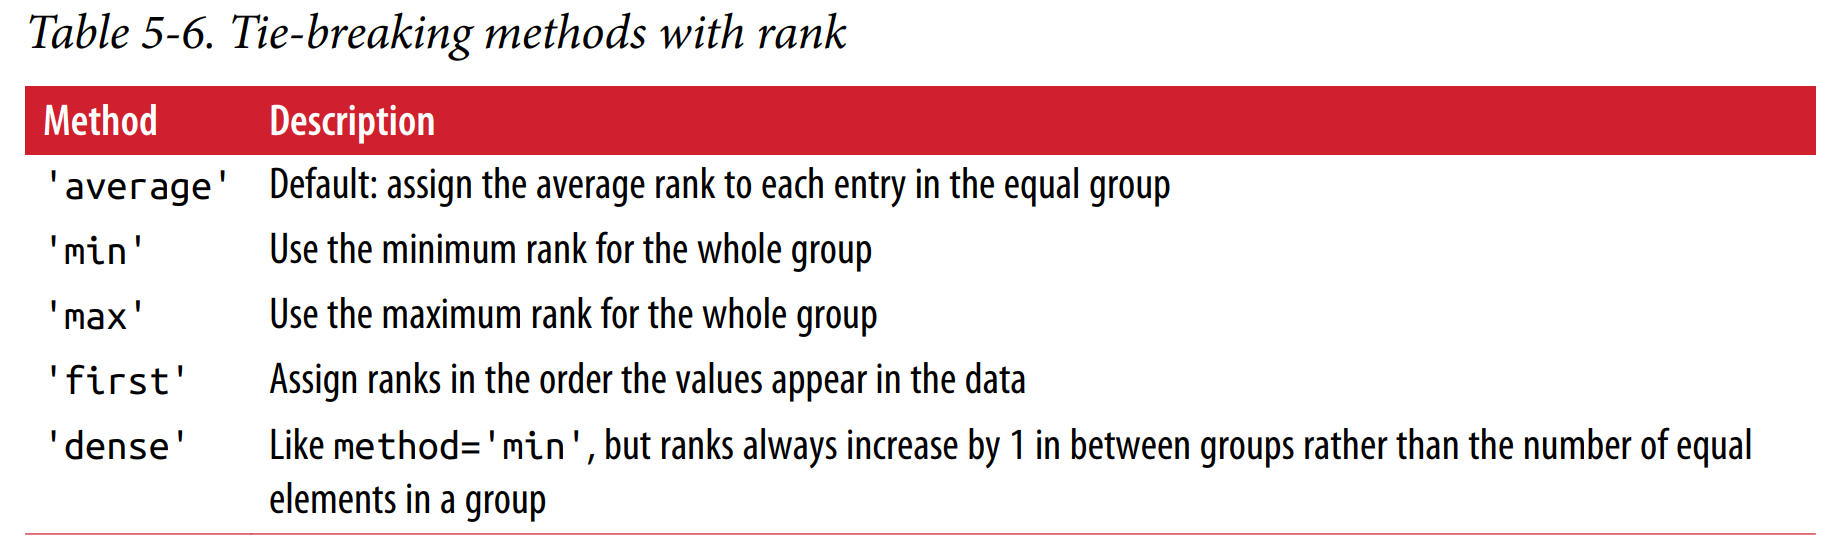 또한 DataFrame에서는 로우나 칼럼에 대해 순위를 정할 수 있다.

In [240]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],'c': [-2, 5, 8, -2.5]})

In [241]:
frame

a    b    c
0  0  4.3 -2.0
1  1  7.0  5.0
2  0 -3.0  8.0
3  1  2.0 -2.5

In [242]:
frame.rank(axis =1)

a    b    c
0  2.0  3.0  1.0
1  1.0  3.0  2.0
2  2.0  1.0  3.0
3  2.0  3.0  1.0

In [243]:
frame.rank(axis='columns')

a    b    c
0  2.0  3.0  1.0
1  1.0  3.0  2.0
2  2.0  1.0  3.0
3  2.0  3.0  1.0

### 중복 색인
지금까지 살펴본 모든 예제는 모두 축의 이름(색인 값)이 유일했다. pandas의 많은 함수(reindex 같은)에서 색인 값은 유일해야 하지만 강제 사항은 아니다. 이제 색인 값이 중본된 Series 객체를 살펴보자

In [244]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [245]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

색인 is_unique 속성은 해당 값이 유일한지 아닌지 알려준다.

In [246]:
obj.index.is_unique

False

중복되는 색인 값이 있으면 색인을 이용한 데이터 선택은 다르게 동작하고 하나의 Series 객체를 반환한다. 하지만 중복되는 색인 값이 없으면 색인을 이용한 데이터 선택은 스칼라 값을 반환한다.

In [247]:
obj['a']

a    0
a    1
dtype: int32

In [248]:
obj['c']

4

DataFrame에서 로우를 선택하는 것도 동일한다

In [249]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [250]:
df

0         1         2
a  0.737888  1.037454  0.178202
a  1.034866 -1.175410 -0.223748
b -1.486102 -0.776099  0.748836
b -1.342591 -1.838003 -0.922344

In [252]:
df.loc['b']

0         1         2
b -1.486102 -0.776099  0.748836
b -1.342591 -1.838003 -0.922344

## 기술통계 계산과 요약 (Summarizing and Computing Descriptive Statistics)
pandas 객체는 일반적인 수학 메소드와 통계 메소드르 가지고 있다. 이 메소드는 대부분 Series나 DataFrame 하나의 칼럼이나 로우에서 단일 값(합이나 평균 같은)을 구하는 축소 혹은 요약통계 범주에 속한다. 순수 NumPy 배열에서 제공하는 동일한 메소드와 비교하여 pandas의 메소드는 처음부터 누락된 데이터를 제외하도록 설계되었다. 다음과 같은 DataFrame을 생각해보자

In [253]:
 df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                    [np.nan, np.nan], [0.75, -1.3]],
                   index=['a', 'b', 'c', 'd'],
                   columns=['one', 'two'])

In [254]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

DataFrame의 sum 메소드를 호출하면 각 칼럼의 합을 답은 Series를 반환한다.

In [255]:
df.sum()

one    9.25
two   -5.80
dtype: float64

axis = 1 옵션을 넘기면 각 로우의 합을 반환한다.

In [256]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [257]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

전체 로우나 칼럼의 값이 NA가 아니라면 계산 과정에서 NA 값은 제외시키고 계산된다. 이는 skipna옵션을 통해 조정할 수 있다.

In [258]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

공통적으로 사용되는 옵션을 정리하면(축소 메소드 옵션)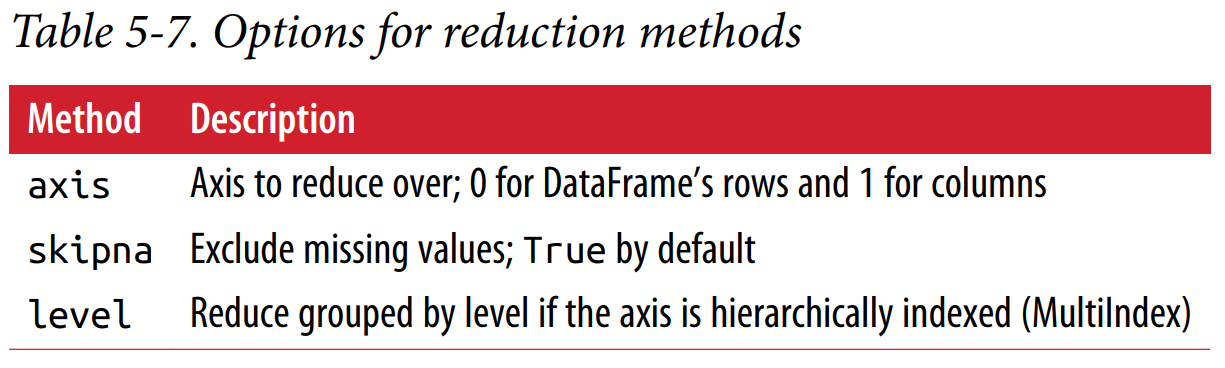  
idxmin이나 idxmax 같은 메소드는 최소 혹은 최대 값을 가지고 있는 색인 값 같은 간접 통계를 반환한다.

In [259]:
df.idxmax()

one    b
two    d
dtype: object

또 다른 메소드에는 누산 메소드가 있다.

In [260]:
df.cumsum()

one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8

축소나 누산도 아닌 다른 종류의 메소드로 describe가 있는데, describe 메소드는 한 번에 통계 결과를 여러 개 만들어낸다.

In [261]:
df.describe()

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

수치 데이터가 아니면 다른 요약 통계를 생성한다.

In [263]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

기술통계와 요약통계에 관련된 메소드는 다음의 표를 참조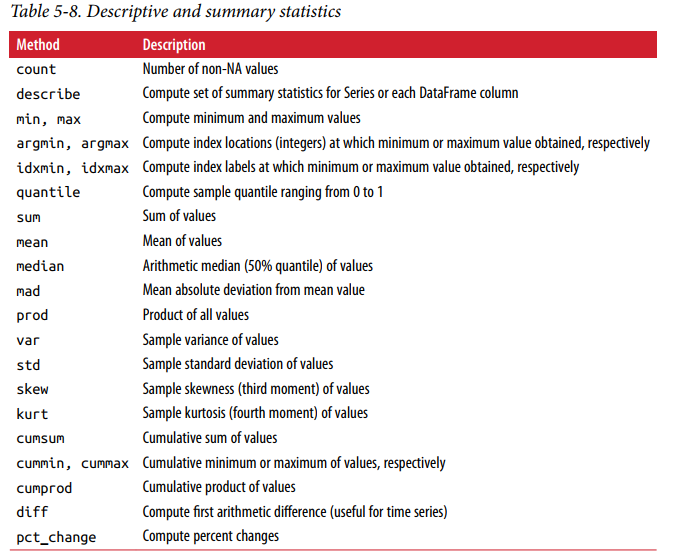

### 상관관계와 공분산
상관관계와 공분산 같은 요약통계 계산은 인자가 두 벌 필요하다. 구글 파이낸스 사이트에서 구한 주식 가격과 시가 총액을 담고 있는 다음 DataFrame에 대해 생각해보자.

그럴려면 pandas 외부 확장 모듈(pandas_datareader)설치해야 한다.  conda 나 pip 모듈로 설치이용
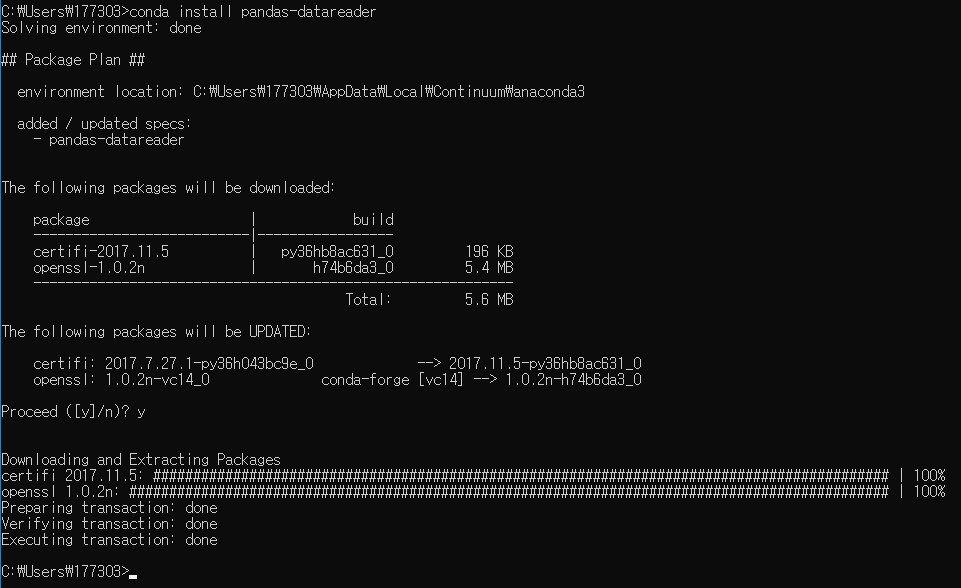


```python
import pandas as pd
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
 for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
 for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
 for ticker, data in all_data.items()})
#실행시키면 안될것이다 야후가 망했기 때문이다.
```


```python
import pandas as pd
from pandas_datareader import data

all_data = {}
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
    all_data[ticker] = data.DataReader(ticker, 'google', '2015-01-01', '2016-01-01')
    
price = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
volume = pd.DataFrame({tic: data['Volume'] for tic, data in all_data.items()})
#구글도 접근이 불가 할꺼다
```

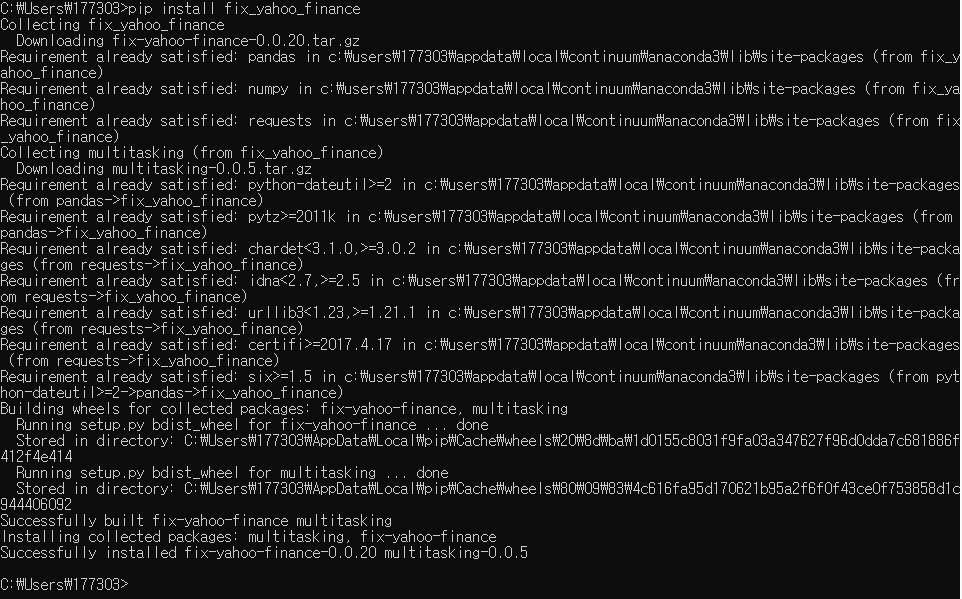

```python
#검색해서 pandas 팀이 교육용으로 만든 모듈 쓰자
import pandas as pd
import pandas_datareader.data as pdweb
from pandas_datareader import data as pdr
import fix_yahoo_finance # must pip install first 
```

```python
data = pdr.get_data_yahoo(
            # tickers list (single tickers accepts a string as well)
            tickers = ["SPY", "IWM", "..."],

            # start date (YYYY-MM-DD / datetime.datetime object)
            # (optional, defaults is 1950-01-01)
            start = "2017-01-01",

            # end date (YYYY-MM-DD / datetime.datetime object)
            # (optional, defaults is Today)
            end = "2017-04-30",

            # return a multi-index dataframe
            # (optional, default is Panel, which is deprecated)
            as_panel = False,

            # group by ticker (to access via data['SPY'])
            # (optional, default is 'column')
            group_by = 'ticker',

            # adjust all OHLC automatically
            # (optional, default is False)
            auto_adjust = True,

            # download dividend + stock splits data
            # (optional, default is None)
            # options are:
            #   - True (returns history + actions)
            #   - 'only' (actions only)
            actions = True,

            # How may threads to use?
            threads = 10
        )
```

In [42]:
import pandas as pd
import pandas_datareader.data as pdweb
from pandas_datareader import data as pdr
import fix_yahoo_finance # must pip install first 

data = pdr.get_data_yahoo(['AAPL', 'IBM', 'MSFT', 'GOOG'],'2015-01-01', '2016-01-01')
#data = pdr.get_data_yahoo(['AAPL', 'IBM', 'MSFT', 'GOOG'],'2015-01-01', '2016-01-01', as_panel=False,group_by = 'ticker')

[*********************100%***********************]  4 of 4 downloaded

In [43]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 253 (major_axis) x 4 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2014-12-31 00:00:00 to 2015-12-31 00:00:00
Minor_axis axis: AAPL to MSFT

In [44]:
data = pdr.get_data_yahoo(['AAPL', 'IBM', 'MSFT', 'GOOG'],'2015-01-01', '2016-01-01', as_panel=False,group_by = 'ticker')

[*********************100%***********************]  4 of 4 downloaded

In [45]:
data

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2014-12-31  112.820000  113.129997  110.209999  110.379997  104.488365   
2015-01-02  111.389999  111.440002  107.349998  109.330002  103.494423   
2015-01-05  108.290001  108.650002  105.410004  106.250000  100.578819   
2015-01-06  106.540001  107.430000  104.629997  106.260002  100.588287   
2015-01-07  107.199997  108.199997  106.699997  107.750000  101.998764   
2015-01-08  109.230003  112.150002  108.699997  111.889999  105.917770   
2015-01-09  112.669998  113.250000  110.209999  112.010002  106.031380   
2015-01-12  112.599998  112.629997  108.800003  109.250000  103.418694   
2015-01-13  111.430000  112.800003  108.910004  110.220001  104.336922   
2015-01-14  109.040001  110.489998  108.500000  109.800003  103.939339   
2015-01-15  110.000000  110.059998  106.660004  106.820000  101.118393   
2015-01-16  107.029999  107.580002  105.199997  105.989998  100.332695   
2015-01-20  107.839996  108.970001  106.500000  108.720001  102.916985   
2015-01-21  108.949997  111.059998  108.269997  109.550003  103.702690   
2015-01-22  110.260002  112.470001  109.720001  112.400002  106.400558   
2015-01-23  112.300003  113.750000  111.529999  112.980003  106.949615   
2015-01-26  113.739998  114.360001  112.800003  113.099998  107.063194   
2015-01-27  112.419998  112.480003  109.029999  109.139999  103.314560   
2015-01-28  117.629997  118.120003  115.309998  115.309998  109.155235   
2015-01-29  116.320000  119.190002  115.559998  118.900002  112.553627   
2015-01-30  118.400002  120.000000  116.849998  117.160004  110.906487   
2015-02-02  118.050003  119.169998  116.080002  118.629997  112.298027   
2015-02-03  118.500000  119.089996  117.610001  118.650002  112.316956   
2015-02-04  118.500000  120.510002  118.309998  119.559998  113.178398   
2015-02-05  120.019997  120.230003  119.250000  119.940002  113.986198   
2015-02-06  120.019997  120.250000  118.449997  118.930000  113.026321   
2015-02-09  118.550003  119.839996  118.430000  119.720001  113.777115   
2015-02-10  120.169998  122.150002  120.160004  122.019997  115.962944   
2015-02-11  122.769997  124.919998  122.500000  124.879997  118.680969   
2015-02-12  126.059998  127.480003  125.570000  126.459999  120.182549   
...                ...         ...         ...         ...         ...   
2015-11-18  115.760002  117.489998  115.500000  117.290001  112.921310   
2015-11-19  117.639999  119.750000  116.760002  118.779999  114.355820   
2015-11-20  119.199997  119.919998  118.849998  119.300003  114.856453   
2015-11-23  119.269997  119.730003  117.339996  117.750000  113.364174   
2015-11-24  117.330002  119.349998  117.120003  118.879997  114.452087   
2015-11-25  119.209999  119.230003  117.919998  118.029999  113.633751   
2015-11-27  118.290001  118.410004  117.599998  117.809998  113.421944   
2015-11-30  117.989998  119.410004  117.750000  118.300003  113.893692   
2015-12-01  118.750000  118.809998  116.860001  117.339996  112.969444   
2015-12-02  117.339996  118.110001  116.080002  116.279999  111.948929   
2015-12-03  116.550003  116.790001  114.220001  115.199997  110.909157   
2015-12-04  115.290001  119.250000  115.110001  119.029999  114.596504   
2015-12-07  118.980003  119.860001  117.809998  118.279999  113.874435   
2015-12-08  117.519997  118.599998  116.860001  118.230003  113.826294   
2015-12-09  117.639999  117.690002  115.080002  115.620003  111.313515   
2015-12-10  116.040001  116.940002  115.510002  116.169998  111.843025   
2015-12-11  115.190002  115.389999  112.849998  113.180000  108.964409   
2015-12-14  112.180000  112.680000  109.790001  112.480003  108.290482   
2015-12-15  111.940002  112.800003  110.349998  110.489998  106.374588   
2015-12-16  111.070000  111.989998  108.800003  111.339996  107.192924   
2015-12-17  112.019997

각항목의 퍼센트 변화율을 계산해보자

In [58]:
returns = data.pct_change()

In [59]:
returns.tail()

AAPL                                                    \
                Open      High       Low     Close Adj Close    Volume   
Date                                                                     
2015-12-24  0.016128  0.001378  0.006996 -0.005340 -0.005340 -0.584462   
2015-12-28 -0.012936 -0.012018 -0.016396 -0.011201 -0.011201  0.967827   
2015-12-29 -0.005856  0.016157  0.006404  0.017974  0.017974  0.158290   
2015-12-30  0.015146 -0.006671  0.002995 -0.013059 -0.013058 -0.184842   
2015-12-31 -0.014459 -0.015363 -0.022019 -0.019195 -0.019195  0.611629   

                 IBM                                  ...         MSFT  \
                Open      High       Low     Close    ...          Low   
Date                                                  ...                
2015-12-24  0.000940 -0.003087  0.000000 -0.002093    ...    -0.000180   
2015-12-28 -0.004984 -0.006048 -0.011368 -0.004629    ...    -0.008118   
2015-12-29  0.003703  0.014633  0.012158  0.015769    ...     0.019644   
2015-12-30  0.009620  0.002713  0.007381 -0.003148    ...     0.004103   
2015-12-31 -0.003654 -0.009541 -0.011852 -0.012344    ...    -0.015456   

                                              GOOG                      \
               Close Adj Close    Volume      Open      High       Low   
Date                                                                     
2015-12-24 -0.002687 -0.002687 -0.649191 -0.005203 -0.003792  0.003521   
2015-12-28  0.005030  0.005030  1.267294  0.004496  0.015492  0.003884   
2015-12-29  0.010724  0.010724  0.278062  0.018289  0.022268  0.022561   
2015-12-30 -0.004244 -0.004244 -0.217331  0.012926 -0.003051  0.000613   
2015-12-31 -0.014740 -0.014740  0.259375 -0.009142 -0.010417 -0.011162   

                                          
               Close Adj Close    Volume  
Date                                      
2015-12-24 -0.002546 -0.002546 -0.663325  
2015-12-28  0.018854  0.018854  1.874241  
2015-12-29  0.018478  0.018478  0.164786  
2015-12-30 -0.007211 -0.007211 -0.267252  
2015-12-31 -0.015720 -0.015720  0.160520  

[5 rows x 24 columns]

In [94]:
ibm_price = data['IBM']['Close'].pct_change()

In [73]:
aapl_price = data['AAPL']['Close'].pct_change()

In [90]:
ddf = pd.DataFrame([ibm_price , aapl_price])

In [91]:
ddf.tail()

Date   2014-12-31  2015-01-02  2015-01-05  2015-01-06  2015-01-07  2015-01-08  \
Close         NaN    0.010097   -0.015735   -0.021566   -0.006536    0.021735   
Close         NaN   -0.009513   -0.028172    0.000094    0.014022    0.038422   

Date   2015-01-09  2015-01-12  2015-01-13  2015-01-14     ...      2015-12-17  \
Close    0.004356   -0.016781    0.002365   -0.006441     ...       -0.018235   
Close    0.001073   -0.024641    0.008879   -0.003811     ...       -0.021196   

Date   2015-12-18  2015-12-21  2015-12-22  2015-12-23  2015-12-24  2015-12-28  \
Close   -0.013528    0.004448    0.017934    0.004423   -0.002093   -0.004629   
Close   -0.027069    0.012261   -0.000932    0.012870   -0.005340   -0.011201   

Date   2015-12-29  2015-12-30  2015-12-31  
Close    0.015769   -0.003148   -0.012344  
Close    0.017974   -0.013059   -0.019195  

[2 rows x 253 columns]

corr 메소드는 NA가 아니고 정렬된 색인에서 연속하는 두 Series에 대해 상관관계를 계산하고 cov 메소드는 공분산을 계산한다.

In [50]:
returns['MSFT']['Close'].corr(returns['IBM']['Close'])

0.55017339302969914

In [95]:
returns['MSFT']['Close'].cov(returns['IBM']['Close'])

0.00013127195630843993

데이터 마이닝이 잘되었다면 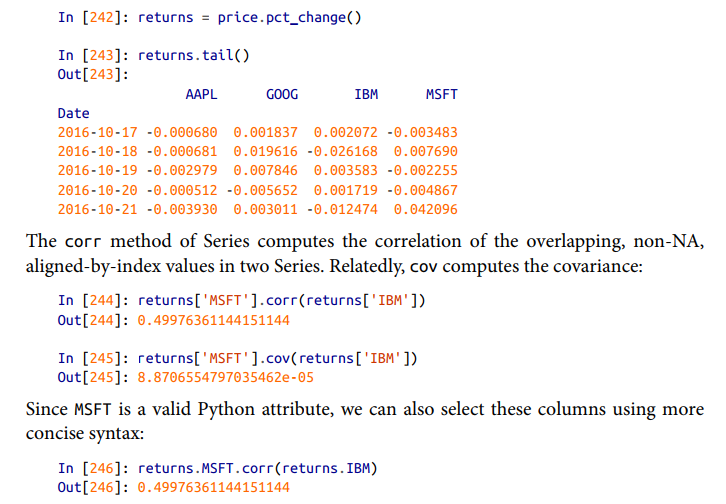 이렇게 나올것이다

아니면 이제까지 배운 내용 가지고 위와 비슷하게 Close 관련 항목 각 회사 별로 나열 할 수 있을 것이다
(DataFrame 을 이용하는것 을추천한다 비균질 데이터 라서 , ndarray는 균질 데이터에 최적화 되서 힘들 것이다.)
모르면 구글링하거나 스택오버플로우나 pandas 커뮤니티 검색 해볼것~


**아마 이 문제에 대한 힌트는 DataFrame 과 : 연산자 잘 사용해볼것! **

스터디 이끄미로서 최초이자 마지막 숙제이다.

반면에 DataFrame에서 corr과 cov 메소드는 DataFrame 행렬상에서 상관관계와 공분산을 계산한다.

In [96]:
returns.corr()

AAPL                                                    \
                    Open      High       Low     Close Adj Close    Volume   
AAPL Open       1.000000  0.652531  0.830247  0.235440  0.236153 -0.178150   
     High       0.652531  1.000000  0.730202  0.680766  0.678797 -0.041338   
     Low        0.830247  0.730202  1.000000  0.617011  0.617984 -0.367518   
     Close      0.235440  0.680766  0.617011  1.000000  0.999505 -0.222187   
     Adj Close  0.236153  0.678797  0.617984  0.999505  1.000000 -0.226624   
     Volume    -0.178150 -0.041338 -0.367518 -0.222187 -0.226624  1.000000   
IBM  Open       0.483077  0.321655  0.423047  0.114651  0.111719 -0.174566   
     High       0.303531  0.391152  0.372010  0.321365  0.318969 -0.118330   
     Low        0.307468  0.383660  0.439733  0.375624  0.374372 -0.247837   
     Close      0.124105  0.298616  0.317181  0.513448  0.512653 -0.187111   
     Adj Close  0.125720  0.294999  0.318702  0.514099  0.513920 -0.190933   
     Volume    -0.122173 -0.060987 -0.173715 -0.089800 -0.089651  0.398465   
MSFT Open       0.550041  0.389222  0.517895  0.179420  0.178006 -0.095079   
     High       0.335829  0.405136  0.376636  0.346955  0.345322 -0.027293   
     Low        0.388864  0.411505  0.500473  0.386818  0.385738 -0.226865   
     Close      0.117571  0.323454  0.284603  0.522070  0.521852 -0.151039   
     Adj Close  0.121523  0.326378  0.288675  0.522646  0.522403 -0.153790   
     Volume    -0.137438 -0.114810 -0.230298 -0.180667 -0.182403  0.584233   
GOOG Open       0.497481  0.308782  0.437407  0.162829  0.162731 -0.047936   
     High       0.324271  0.288568  0.334313  0.207169  0.206739 -0.014283   
     Low        0.370370  0.306788  0.422892  0.263655  0.263929 -0.161050   
     Close      0.100022  0.210412  0.235719  0.380996  0.381853 -0.106676   
     Adj Close  0.100022  0.210412  0.235719  0.380996  0.381853 -0.106676   
     Volume    -0.157457 -0.099817 -0.221769 -0.134663 -0.135701  0.418179   

                     IBM                                  ...         MSFT  \
                    Open      High       Low     Close    ...          Low   
AAPL Open       0.483077  0.303531  0.307468  0.124105    ...     0.388864   
     High       0.321655  0.391152  0.383660  0.298616    ...     0.411505   
     Low        0.423047  0.372010  0.439733  0.317181    ...     0.500473   
     Close      0.114651  0.321365  0.375624  0.513448    ...     0.386818   
     Adj Close  0.111719  0.318969  0.374372  0.512653    ...     0.385738   
     Volume    -0.174566 -0.118330 -0.247837 -0.187111    ...    -0.226865   
IBM  Open       1.000000  0.641839  0.686272  0.289874    ...     0.523523   
     High       0.641839  1.000000  0.760647  0.744091    ...     0.466564   
     Low        0.686272  0.760647  1.000000  0.750449    ...     0.580643   
     Close      0.289874  0.744091  0.750449  1.000000    ...     0.397810   
     Adj Close  0.283958  0.739675  0.745976  0.997192    ...     0.392795   
     Volume    -0.121637  0.022825 -0.281979 -0.152869    ...    -0.101238   
MSFT Open       0.627445  0.418390  0.464225  0.176100    ...     0.809366   
     High       0.454863  0.504422  0.481016  0.383094    ...     0.815562   
     Low        0.523523  0.466564  0.580643  0.397810    ...     1.000000   
     Close      0.227417  0.389154  0.437833  0.550173    ...     0.749642   
     Adj Close  0.230992  0.391510  0.441357  0.551967    ...     0.750271   
     Volume    -0.080651 -0.081070 -0.098777 -0.085173    ...    -0.189677   
GOOG Open       0.493530  0.294336  0.349958  0.164433    ...     0.528067   
     High       0.361854  0.306128  0.357608  0.243997    ...     0.484619   
     Low        0.430901  0.354403  0.480495  0.333064    ...     0.580982   
     Close      0.183359  0.309993  0.378028  0.450254    ...     0.411221   
     Adj Close  0.183359  0.309993  0.378028  0.450254    ...     0.411221   
     Volume    -0.081498 -0.050140 -0.156

In [97]:
returns.cov()

AAPL                                                    \
                    Open      High       Low     Close Adj Close    Volume   
AAPL Open       0.000467  0.000184  0.000344  0.000086  0.000086 -0.001377   
     High       0.000184  0.000170  0.000183  0.000150  0.000149 -0.000193   
     Low        0.000344  0.000183  0.000368  0.000199  0.000200 -0.002523   
     Close      0.000086  0.000150  0.000199  0.000284  0.000284 -0.001339   
     Adj Close  0.000086  0.000149  0.000200  0.000284  0.000284 -0.001365   
     Volume    -0.001377 -0.000193 -0.002523 -0.001339 -0.001365  0.127978   
IBM  Open       0.000129  0.000052  0.000101  0.000024  0.000023 -0.000773   
     High       0.000071  0.000056  0.000078  0.000059  0.000058 -0.000461   
     Low        0.000082  0.000061  0.000104  0.000078  0.000077 -0.001088   
     Close      0.000036  0.000052  0.000082  0.000116  0.000116 -0.000897   
     Adj Close  0.000036  0.000051  0.000082  0.000115  0.000115 -0.000911   
     Volume    -0.001298 -0.000391 -0.001640 -0.000744 -0.000743  0.070096   
MSFT Open       0.000210  0.000090  0.000176  0.000053  0.000053 -0.000601   
     High       0.000115  0.000084  0.000114  0.000092  0.000092 -0.000155   
     Low        0.000141  0.000090  0.000161  0.000109  0.000109 -0.001364   
     Close      0.000045  0.000075  0.000097  0.000157  0.000156 -0.000962   
     Adj Close  0.000047  0.000076  0.000098  0.000156  0.000156 -0.000978   
     Volume    -0.001550 -0.000782 -0.002307 -0.001588 -0.001603  0.109077   
GOOG Open       0.000212  0.000080  0.000166  0.000054  0.000054 -0.000339   
     High       0.000125  0.000067  0.000115  0.000062  0.000062 -0.000091   
     Low        0.000137  0.000068  0.000139  0.000076  0.000076 -0.000985   
     Close      0.000040  0.000051  0.000084  0.000119  0.000119 -0.000709   
     Adj Close  0.000040  0.000051  0.000084  0.000119  0.000119 -0.000709   
     Volume    -0.001500 -0.000574 -0.001876 -0.001000 -0.001008  0.065944   

                     IBM                                  ...         MSFT  \
                    Open      High       Low     Close    ...          Low   
AAPL Open       0.000129  0.000071  0.000082  0.000036    ...     0.000141   
     High       0.000052  0.000056  0.000061  0.000052    ...     0.000090   
     Low        0.000101  0.000078  0.000104  0.000082    ...     0.000161   
     Close      0.000024  0.000059  0.000078  0.000116    ...     0.000109   
     Adj Close  0.000023  0.000058  0.000077  0.000116    ...     0.000109   
     Volume    -0.000773 -0.000461 -0.001088 -0.000897    ...    -0.001364   
IBM  Open       0.000153  0.000086  0.000104  0.000048    ...     0.000109   
     High       0.000086  0.000118  0.000102  0.000109    ...     0.000085   
     Low        0.000104  0.000102  0.000151  0.000123    ...     0.000120   
     Close      0.000048  0.000109  0.000123  0.000180    ...     0.000090   
     Adj Close  0.000047  0.000107  0.000122  0.000178    ...     0.000088   
     Volume    -0.000741  0.000122 -0.001702 -0.001008    ...    -0.000837   
MSFT Open       0.000137  0.000080  0.000101  0.000042    ...     0.000240   
     High       0.000089  0.000087  0.000093  0.000081    ...     0.000217   
     Low        0.000109  0.000085  0.000120  0.000090    ...     0.000282   
     Close      0.000050  0.000075  0.000096  0.000131    ...     0.000224   
     Adj Close  0.000051  0.000076  0.000096  0.000131    ...     0.000224   
     Volume    -0.000521 -0.000460 -0.000633 -0.000596    ...    -0.001664   
GOOG Open       0.000121  0.000063  0.000085  0.000044    ...     0.000175   
     High       0.000080  0.000060  0.000078  0.000058    ...     0.000146   
     Low        0.000091  0.000066  0.000101  0.000076    ...     0.000167   
     Close      0.000042  0.000063  0.000086  0.000112    ...     0.000128   
     Adj Close  0.000042  0.000063  0.000086  0.000112    ...     0.000128   
     Volume    -0.000445 -0.000240 -0.000

DataFrame의 corrwith 메소드를 사용하면 다은 Series나 DataFrame과의 상관관계를 계산한다.  
Series를 넘기면 각 칼럼에 대해 계산한 상관관계를 담고 있는 Series를 반환한다.

In [100]:
returns.corrwith(returns['IBM']['Close'])

AAPL  Open         0.124105
      High         0.298616
      Low          0.317181
      Close        0.513448
      Adj Close    0.512653
      Volume      -0.187111
IBM   Open         0.289874
      High         0.744091
      Low          0.750449
      Close        1.000000
      Adj Close    0.997192
      Volume      -0.152869
MSFT  Open         0.176100
      High         0.383094
      Low          0.397810
      Close        0.550173
      Adj Close    0.551967
      Volume      -0.085173
GOOG  Open         0.164433
      High         0.243997
      Low          0.333064
      Close        0.450254
      Adj Close    0.450254
      Volume      -0.075927
dtype: float64

앞의 데이터 마이닝 과정이 잘되었다면 
```python
returns.corrwith(returns.IBM)
```
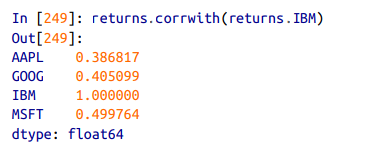

DataFrame을 넘기면 맞아떨어지는 칼럼의 이름에 대한 상관관계를 계산한다. 여기서는 시가 총액의 퍼센트 변화율에 대한 상관관계를 계산해보자

In [126]:
returns.corrwith(data)

AAPL  Open         0.158448
      High         0.127940
      Low          0.137721
      Close        0.141838
      Adj Close    0.139889
      Volume       0.406991
IBM   Open         0.104156
      High         0.103380
      Low          0.104297
      Close        0.114131
      Adj Close    0.118014
      Volume       0.583770
MSFT  Open         0.135503
      High         0.128823
      Low          0.133290
      Close        0.131503
      Adj Close    0.128555
      Volume       0.534626
GOOG  Open         0.112309
      High         0.102810
      Low          0.105339
      Close        0.101445
      Adj Close    0.101445
      Volume       0.481427
dtype: float64

```python
returns.corrwith(volume)
```
앞의 데이터 마이닝 과정 잘되었다면 이렇게 나올 것이다.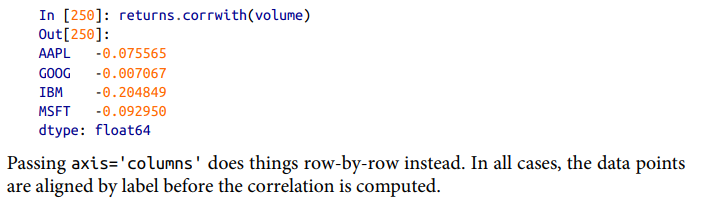

### 유일 값, 값 세기 , 멤버십
또 따른 종류의 메소드로는 1차원 Series에 담긴 값의 정보를 추출하는 메소드가 있다 다음 예제를 살펴보자.

In [140]:
 obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

첫 번째로는 uniques 함수는 Series에서 중복되는 값을 제거하고 유일 값만 담고 있는 Series를 반환한다

In [141]:
uniques = obj.unique()

In [142]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

유일 값은 정렬된 순서로 반환된지 않지만 필요하다면 uniques.sort()를 이용해서 나중에 정렬할 수도 있다. 그리고 value_counts는 Series에서 도수를 계산하여 반환한다.

In [143]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

value_counts에서 반환하는 Series는 담고 있는 값으로 내림차순 정렬된다. 또한 values_counts 메소드는 pandas의 최상위 메소드로, 어떤 배열이나 순차 자료 구조에서도 사용할 수 있다.

In [144]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

마지막으로 isin 메소드는 어떤 값이 Series에 있는지 나타내는 불리언 벡터를 반환하는데, Series나 DataFrame의 칼럼에서 값을 골라내고 싶을 때 유용하게 사용할 수 있다.

In [145]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [146]:
 mask = obj.isin(['b', 'c'])

In [147]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [148]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

isin 관련된것이 index.get_indexer 메소드이다 이 메소드는 가능하지 않은 값의 배열에서 고유 한 값의 다른 배열로인덱스 배열을 제공합니다.

In [149]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [150]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [151]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

지금 까지 살펴 본펴본 메소드 아래와 같다
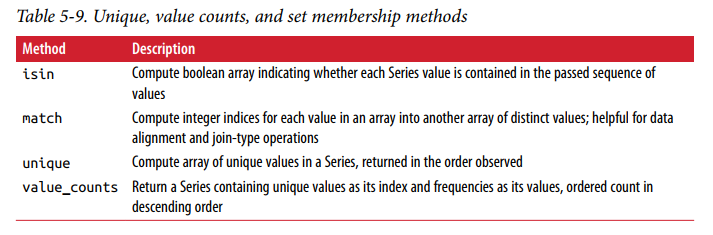
DataFrame의 여러 로우에 대해 히스토그램을 구해야 하는 경우가 있다. 다음의 예제를 보자

In [152]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})

In [153]:
data

Qu1  Qu2  Qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4

In [154]:
result = data.apply(pd.value_counts).fillna(0)

In [155]:
result

Qu1  Qu2  Qu3
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0

DataFrame의 apply 함수에 pandas.value_counts를 넘기면 다음과 같은 결과를 얻을 수 있다. values_counts 메소드의 결과가 DataFrame의 칼럼 크기보다 작을 수 있기 때문에 fillna(0) 함수를 이용해서 비어있는 값은 0으로 채워준다.

## 누락된 데이터 처리하기(2판에서는 7장 Data Cleaning and Preparation 옮기고 확장됨)
누락된 데이터를 처리하는 일은 데이터 분석 애플리케이션에서 흔히 있는 일이다. pandas의 설계 목표중 하나는 누락 데이터를 가능한 한 쉽게 처리할 수 있돌녹 하는 것이다. 예를 들어 앞에서 살펴봤듯이 pandas 객체의 모든 기술 통계는 누락된 데이터를 배제하고 처리한다.  

pandas는 누락된 데이터를 실수든 아니든 모두 NaN(Not a Number)으로 취급한다. 그래서 누락된 값을 쉽게 찾을 수 있게 하는 파수병 역활을 한다.

In [157]:
import numpy as np
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [158]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [159]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

파이썬의 내장 None 값 또한 NA(Not Available) 값으로 취급된다.

In [160]:
string_data[0] = None

In [161]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

pandas에서 NA 값을 표기하는 것이 최선이라는 주장을 하려는 것은 아니지만 pandas에서 사용하는 방법이 더 간단하고  일관적이다.
성능 면에서도 훌륭하며 NumPy 자료형에는 존재 하지 않는 진짜 NA 자료형이나 비트 패턴 위에서 만든 간단한 API를 제공한다. NumPy는 계속 개발 중인 프로젝트이므로 변경 가능성이 이 있다.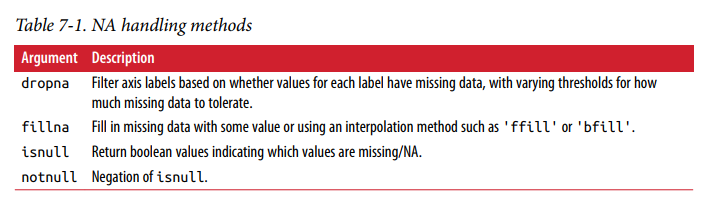
### 누락된 데이터 골라내기
누락된 데이터를 골라내는 방법에는 여러 가지 있는데, 직접 손으로 제거하는 것도 한 방법이지만 dropna를 사용하는 것도 매우 유용한 방법이다. Series에 대해 dropna 메소드를 적용하면 실제 데이터가 들어 있는 색인 값과 데이터를 Series 값으로 반환한다.

In [162]:
from numpy import nan as NA

In [163]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [164]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [165]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

DataFrame 객체의 경우는 조금 복잡한데, 모두 NA인 로우나 칼럼을 제외하든가 하나라도 NA인 값을 포함하고 있는 로우나 칼럼을 제외시킬 수도 있다. dropna는 기본적으로 NA 값이 하나라도 있는 로우는 제외 시킨다.

In [166]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], 
                     [NA, NA, NA], [NA, 6.5, 3.]])

In [167]:
cleaned = data.dropna()

In [168]:
data

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [169]:
cleaned

0    1    2
0  1.0  6.5  3.0

how='all' 옵션을 주면 모든 값이 NA인 로우만 제외시킨다.

In [171]:
data.dropna(how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

칼럼을 제외시키는 방법은 옵션으로 axis = 1 을 주면 로우를 제외시키는 것과 동일한 방식으로 동작한다.

In [172]:
data[4] = NA

In [173]:
 data

0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN

In [174]:
data.dropna(axis=1, how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

DataFrame의 로우를 제외시키는 방법은 주로 시계열 데이터에 사용되는 경향이 있다. 몇 개 이상의 값이 들어있는 로우만 살펴보고 싶다면 thresh 인자에 원하는 값을 넘기면 된다.

In [175]:
df = pd.DataFrame(np.random.randn(7, 3))

In [176]:
df.iloc[:4, 1] = NA

In [177]:
df.iloc[:2, 2] = NA

In [178]:
df

0         1         2
0 -0.869832       NaN       NaN
1 -0.186124       NaN       NaN
2  0.167872       NaN -0.602640
3 -0.195642       NaN  0.021830
4  0.837290 -0.656716  0.814642
5  2.046831 -0.277396 -0.781861
6 -1.535572 -2.059753  0.354886

In [179]:
df.dropna()

0         1         2
4  0.837290 -0.656716  0.814642
5  2.046831 -0.277396 -0.781861
6 -1.535572 -2.059753  0.354886

### 누락된 값 채우기 
누락된 값을 제외시키지 않고(잠재적으로 다른 데이터도 함께 버려질 가능성이 있다) 데이터상의 '구멍'을 어떻게든 메우고 싶은 경우가 있는데, 이런 경우에는 fillna 메소드를 활용하면 된다. 즉 fillna 메소드에 채워 넣고 싶은 값을 넘겨주면 된다.

In [180]:
 df.fillna(0)

0         1         2
0 -0.869832  0.000000  0.000000
1 -0.186124  0.000000  0.000000
2  0.167872  0.000000 -0.602640
3 -0.195642  0.000000  0.021830
4  0.837290 -0.656716  0.814642
5  2.046831 -0.277396 -0.781861
6 -1.535572 -2.059753  0.354886

fillna에 사전 값을 넘겨서 각 칼럼마다 다른 값을 채워 넣을 수도 있다.

In [181]:
df.fillna({1: 0.5, 2: 0})

0         1         2
0 -0.869832  0.500000  0.000000
1 -0.186124  0.500000  0.000000
2  0.167872  0.500000 -0.602640
3 -0.195642  0.500000  0.021830
4  0.837290 -0.656716  0.814642
5  2.046831 -0.277396 -0.781861
6 -1.535572 -2.059753  0.354886

fillna는 새로운 객체를 반환하지만 다음처럼 기존 객체를 변경할 수도 있다.

In [182]:
#fillna는 값을 채워 넣은 객체의 참조를 반환한다.
_ = df.fillna(0, inplace=True)


In [183]:
df

0         1         2
0 -0.869832  0.000000  0.000000
1 -0.186124  0.000000  0.000000
2  0.167872  0.000000 -0.602640
3 -0.195642  0.000000  0.021830
4  0.837290 -0.656716  0.814642
5  2.046831 -0.277396 -0.781861
6 -1.535572 -2.059753  0.354886

재색인에서 사용 가능한 보간 메소드는 fillna에서도 사용이 가능하다.

In [184]:
df = pd.DataFrame(np.random.randn(6, 3))

In [185]:
df.iloc[2:, 1] = NA

In [186]:
df.iloc[4:, 2] = NA

In [187]:
df

0         1         2
0  0.123745 -0.596335  1.094585
1  0.294893  1.662671 -0.684750
2 -0.878570       NaN  1.376870
3  1.366098       NaN  0.288196
4 -1.614958       NaN       NaN
5  0.485811       NaN       NaN

In [188]:
df.fillna(method='ffill')

0         1         2
0  0.123745 -0.596335  1.094585
1  0.294893  1.662671 -0.684750
2 -0.878570  1.662671  1.376870
3  1.366098  1.662671  0.288196
4 -1.614958  1.662671  0.288196
5  0.485811  1.662671  0.288196

In [189]:
df.fillna(method='ffill', limit=2)

0         1         2
0  0.123745 -0.596335  1.094585
1  0.294893  1.662671 -0.684750
2 -0.878570  1.662671  1.376870
3  1.366098  1.662671  0.288196
4 -1.614958       NaN  0.288196
5  0.485811       NaN  0.288196

조금만 창의적으로 생각하면 fillna를 이용해서 매우 다양한 일을 할 수 있는데, 예를 들면 series의 평균 값이나 중간 전달할 수도 있다.

In [190]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [191]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

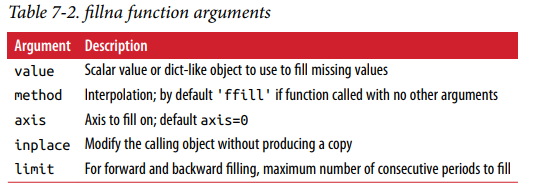

## 계층적 색인 (2판에서는 8장 Data Wrangling: Join, Combine,and Reshape)
계층적 색인(hierarchical indexing)은 pandas의 중요한 기능으로, 축에 대해 다중(둘 이상) 색인 단계를 지정할 수 있도록 해준다. 약간 추상적으로 말하면 차원이 높은 데이터를 낮은 차원의 형식으로 다룰 수 있게 해주는 기능이다. 간단한 예제를 하나 살펴보자. 우선 리스트를 담고 있는 리스트나 배열을 가진 Series를 하나 생성하자.

In [193]:
data = pd.Series(np.random.randn(9),
    index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
    [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [194]:
data

a  1    0.631734
   2    0.412930
   3    0.258015
b  1   -0.786280
   3    1.598608
c  1   -0.272100
   2    0.262582
d  2    0.725778
   3    0.129012
dtype: float64

지금 생성한 객체는 MultiIndex를 색인으로 하는 Series로, 색인의 계층을 보여주고 있다. 바로 위 단게의 색인을 이용해서 하위 계층을 직접 접근할 수 있다.

In [196]:
 data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

계층적으로 색인된 객체는 데이터의 부분집합을 부분적 색인으로 접근partial indexing하는 것이 가능하다.

In [197]:
data['b']

1   -0.786280
3    1.598608
dtype: float64

In [198]:
data['b':'c']


b  1   -0.786280
   3    1.598608
c  1   -0.272100
   2    0.262582
dtype: float64

In [199]:
data.loc[['b', 'd']]

b  1   -0.786280
   3    1.598608
d  2    0.725778
   3    0.129012
dtype: float64

하위 계층의 객체를 선택하는 것도 가능하다

In [200]:
data.loc[:, 2]

a    0.412930
c    0.262582
d    0.725778
dtype: float64

계층적인 색인은 데이터를 재형성하고 피벗 테이블 생성 같은 그룹 기반의 작업을 할 떄 중요하게 사용된다. 예를 들어 위에서 만든 DataFrame 객체에 unstack 메소드를 사용해서 데이터를 새롭게 배열할 수도 있다.

In [201]:
data.unstack()

1         2         3
a  0.631734  0.412930  0.258015
b -0.786280       NaN  1.598608
c -0.272100  0.262582       NaN
d       NaN  0.725778  0.129012

unstack의 반대되는 작업은 stack 메소드가 수행한다

In [202]:
data.unstack().stack()

a  1    0.631734
   2    0.412930
   3    0.258015
b  1   -0.786280
   3    1.598608
c  1   -0.272100
   2    0.262582
d  2    0.725778
   3    0.129012
dtype: float64

DataFrame에서는 두 축 모두 계층적인 색인을 가질수 있다

In [203]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
 index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
 columns=[['Ohio', 'Ohio', 'Colorado'],
  ['Green', 'Red', 'Green']])


In [204]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

계층적 색인의 각 단계는 이름(문자열이나 어떤 파이썬 객체라도 가능하다)을 가질 수 있고, 만약 이름이 있다면 콘솔 출력 시 함께 나타난다(색인의 이름과 축의 라벨을 혼동하지 말자!)

In [205]:
frame.index.names = ['key1', 'key2']

In [206]:
frame.columns.names = ['state', 'color']

In [207]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

칼럼의 부분집합을 부분적 색인으로 접근하는 것도 로우에 대한 부분적 색인과 비슷하게 사용하면 된다.

In [208]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

MultiIndex는 따로 생성한 다음에 재사용이 가능하다. DataFrame의 칼럼 계층의 이름은 다음처럼 생성할 수 있다.
```python
MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
 names=['state', 'color'])
 ```

### 계층 순서 바꾸고 정렬하기
계층적 색인에서 계층 순서를 바꾸거나 지정된 계층에 따라 데이터를 정렬하는 경우도 있다. swaplevel은 넘겨받은 2개의 계층 번호나 이름이 뒤바뀐 새로운 객체를 반환한다 (하지만 데이터는 변경되지 않는다)

In [210]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

반면에 sortlevel 메소드는 단일 계층에 속한 데이터를 정렬한다. swaplevel을 사용해서 계층을 바꿀 떄 대개 sortlevel을 사용해서 결과도 사전식으로 정렬한다.

In [211]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [212]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

객체가 계층적 색인으로 상위 계층부터 사전식으로 정렬이 되어 있다면(sortlevel(0)이나 sort_index()의 결과처럼)데이터를 선택하는 성능이 훨씬 좋아진다.

### 단계별 요약통계
DataFrame과 Series의 많은 기술통계와 요약통계는 level 옵션을 가지고 있는데, 이는 어떤한 축에 대해 합을 구하고 싶은 단계를 지정할 수 있는 옵션이다. 앞에서 살펴본 DataFrame에서 로우나 칼럼을 아래처럼 단계별로 합을 구할 수 있다.

In [213]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [214]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

내부적으로 pandas의 groupby 기능을 이용해서 구현되었는데 자세한 내용은 앞으로 더 살펴본다?  (그냥 첨부된 책 볼 것 )

### DataFrame의 칼럼 사용하기
DataFrame에서 로우를 선택하기 위한 색인이나 하나 이상의 칼럼을 사용하는 것은 드물지 않은 일이다.
아니면 로우의 색인을 DataFrame의 칼럼으로 옮기고 싶을 것이다. 다음과 같은 DataFrame이 있다

In [215]:
 frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
'c': ['one', 'one', 'one', 'two', 'two',
 'two', 'two'],
 'd': [0, 1, 2, 0, 1, 2, 3]})

In [216]:
frame

a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3

DataFrame의 set_index 함수는 하나 이상의 칼럼을 색인으로 하는 새로운 DataFrame을 생성한다.

In [218]:
 frame2 = frame.set_index(['c', 'd'])

In [219]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

다음 처럼 칼럼을 명시적으로 남겨두지 않은 DataFrame에서 삭제된다

In [220]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

반면에 reset_index 함수는 set_index와 반대되는 개념으로, 계층적인 색인 단계가 칼럼으로 이동한다.

In [221]:
 frame2.reset_index()

c  d  a  b
0  one  0  0  7
1  one  1  1  6
2  one  2  2  5
3  two  0  3  4
4  two  1  4  3
5  two  2  5  2
6  two  3  6  1